##Fix geometry

In [16]:
from geopandas import GeoSeries, GeoDataFrame
from shapely.geometry import Polygon

In [2]:
ebola_gdf = GeoDataFrame.from_file("data/in/ebola_outbreaks_before_2014-geocoded_on_cartodb.geojson")

In [19]:
ebola_gdf.tail()

,cartodb_georef_status,cartodb_id,country_code_iso_2_digits,country_name,duration_days,ebola_subtype,end_date,end_datetime,field_1,geometry,geometry_geojson,latitude,longitude,reported_number_of_deaths_among_cases,reported_number_of_human_cases,reported_of_deaths_among_cases,start_date,start_datetime,year_s
28,0,32,SD,Sudan (South Sudan),365,Sudan virus,1976-12-31T00:00:00Z,1976-12-31T00:00:00Z,31,POINT (29.66679 7.869943),"{u'type': u'Polygon', u'coordinates': [[[33.96...",7.869943,29.666790,151,284,0.53,1976-01-01T00:00:00Z,1976-01-01T00:00:00Z,1976
29,0,29,SD,Sudan (South Sudan),364,Sudan virus,1979-12-31T00:00:00Z,1979-12-31T00:00:00Z,28,POINT (29.66679 7.869943),"{u'type': u'Polygon', u'coordinates': [[[33.96...",7.869943,29.666790,22,34,0.65,1979-01-01T00:00:00Z,1979-01-01T00:00:00Z,1979
30,0,23,CI,Côte d'Ivoire (Ivory Coast),364,Taï Forest virus,1994-12-31T00:00:00Z,1994-12-31T00:00:00Z,22,POINT (-5.567946 7.989737),"{u'type': u'Polygon', u'coordinates': [[[-2.85...",7.989737,-5.567946,0,1,0.00,1994-01-01T00:00:00Z,1994-01-01T00:00:00Z,1994
31,0,10,SD,Sudan (South Sudan),365,Sudan virus,2004-12-31T00:00:00Z,2004-12-31T00:00:00Z,9,POINT (29.66679 7.869943),"{u'type': u'Polygon', u'coordinates': [[[33.96...",7.869943,29.666790,7,17,0.41,2004-01-01T00:00:00Z,2004-01-01T00:00:00Z,2004
32,0,31,GB,England,365,Sudan virus,1976-12-31T00:00:00Z,1976-12-31T00:00:00Z,30,POINT (-0.5402400000000001 52.795479),"{u'type': u'MultiPolygon', u'coordinates': [[[...",52.795479,-0.540240,0,1,0.00,1976-01-01T00:00:00Z,1976-01-01T00:00:00Z,1976


###=> Geometry missing for South Sudan, Côte d'Ivoire and England

In [4]:
## What it looks like for Uganda
geom_uganda = ebola_gdf[ebola_gdf.country_name == "Uganda"][0:1]["geometry"]

geom_uganda

9    (POLYGON ((34.108026 3.868938, 34.123736 3.872...
Name: geometry, dtype: object

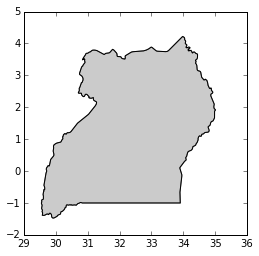

In [5]:
geom_uganda.plot()

In [23]:
##Fixing geometry for South Sudan
geom_ss = ebola_gdf[ebola_gdf.country_name == "Sudan (South Sudan)"][0:1]["geometry"]

print(geom_ss)

print(type(geom_ss))

28    POINT (29.66679 7.869943)
Name: geometry, dtype: object
<class 'geopandas.geoseries.GeoSeries'>


In [8]:
json_str_ss = ebola_gdf[ebola_gdf.country_name == "Sudan (South Sudan)"][0:1]["geometry_geojson"]

json_str_ss

28    {u'type': u'Polygon', u'coordinates': [[[33.96...
Name: geometry_geojson, dtype: object

In [24]:
ds = dict(json_str_ss)

print ds

{28: u"{u'type': u'Polygon', u'coordinates': [[[33.963392999999996, 9.464285], [33.97498, 8.68456], [33.8255, 8.37916], [33.2948, 8.35458], [32.95418, 7.78497], [33.56829, 7.7133400000000005], [34.0751, 7.22595], [34.25032, 6.82607], [34.70702, 6.59422], [35.298007, 5.506], [34.620196, 4.847123], [34.005, 4.249885], [33.39, 3.79], [32.68642, 3.79232], [31.88145, 3.5582700000000003], [31.24556, 3.7819000000000003], [30.83385, 3.50917], [29.95349, 4.1737], [29.715995, 4.600805], [29.159078, 4.389267], [28.696678, 4.455077], [28.428994, 4.287155], [27.979977, 4.408413], [27.374226, 5.233944], [27.213409, 5.550953], [26.465909, 5.946717], [26.213418, 6.546603], [25.796648, 6.979316], [25.124131, 7.500085], [25.114932, 7.825104], [24.567369, 8.229188], [23.88698, 8.61973], [24.194068, 8.728696], [24.537415, 8.917538], [24.794926, 9.810241], [25.069603999999998, 10.27376], [25.790633, 10.411099], [25.962307, 10.136421], [26.477328, 9.55273], [26.752006, 9.466893], [27.112521, 9.638567], [27.

In [11]:
import json

In [12]:
str_ss = json.dumps(ds.get(28))
print(str_ss)

"{u'type': u'Polygon', u'coordinates': [[[33.963392999999996, 9.464285], [33.97498, 8.68456], [33.8255, 8.37916], [33.2948, 8.35458], [32.95418, 7.78497], [33.56829, 7.7133400000000005], [34.0751, 7.22595], [34.25032, 6.82607], [34.70702, 6.59422], [35.298007, 5.506], [34.620196, 4.847123], [34.005, 4.249885], [33.39, 3.79], [32.68642, 3.79232], [31.88145, 3.5582700000000003], [31.24556, 3.7819000000000003], [30.83385, 3.50917], [29.95349, 4.1737], [29.715995, 4.600805], [29.159078, 4.389267], [28.696678, 4.455077], [28.428994, 4.287155], [27.979977, 4.408413], [27.374226, 5.233944], [27.213409, 5.550953], [26.465909, 5.946717], [26.213418, 6.546603], [25.796648, 6.979316], [25.124131, 7.500085], [25.114932, 7.825104], [24.567369, 8.229188], [23.88698, 8.61973], [24.194068, 8.728696], [24.537415, 8.917538], [24.794926, 9.810241], [25.069603999999998, 10.27376], [25.790633, 10.411099], [25.962307, 10.136421], [26.477328, 9.55273], [26.752006, 9.466893], [27.112521, 9.638567], [27.833551

In [13]:
json_ss = json.loads('{"type": "Polygon", "coordinates": [[[33.963392999999996, 9.464285], [33.97498, 8.68456], [33.8255, 8.37916], [33.2948, 8.35458], [32.95418, 7.78497], [33.56829, 7.7133400000000005], [34.0751, 7.22595], [34.25032, 6.82607], [34.70702, 6.59422], [35.298007, 5.506], [34.620196, 4.847123], [34.005, 4.249885], [33.39, 3.79], [32.68642, 3.79232], [31.88145, 3.5582700000000003], [31.24556, 3.7819000000000003], [30.83385, 3.50917], [29.95349, 4.1737], [29.715995, 4.600805], [29.159078, 4.389267], [28.696678, 4.455077], [28.428994, 4.287155], [27.979977, 4.408413], [27.374226, 5.233944], [27.213409, 5.550953], [26.465909, 5.946717], [26.213418, 6.546603], [25.796648, 6.979316], [25.124131, 7.500085], [25.114932, 7.825104], [24.567369, 8.229188], [23.88698, 8.61973], [24.194068, 8.728696], [24.537415, 8.917538], [24.794926, 9.810241], [25.069603999999998, 10.27376], [25.790633, 10.411099], [25.962307, 10.136421], [26.477328, 9.55273], [26.752006, 9.466893], [27.112521, 9.638567], [27.833551, 9.604232], [27.97089, 9.398224], [28.966597, 9.398224], [29.000932, 9.604232], [29.515953, 9.793074], [29.618957, 10.084919], [29.996639, 10.290927], [30.837841, 9.707237], [31.352862000000002, 9.810241], [31.850716, 10.531271], [32.400072, 11.080626], [32.314235, 11.681484], [32.073892, 11.97333], [32.67475, 12.024832], [32.743419, 12.248008], [33.206938, 12.179338], [33.086766, 11.441141], [33.206938, 10.720112], [33.721959, 10.325262], [33.842131, 9.981915], [33.824963, 9.484061], [33.963392999999996, 9.464285]]]}')

In [14]:
coord_ss = json_ss.get('coordinates')

In [15]:
polyg_ss = []

for l in coord_ss[0]:
    polyg_ss.append((l[0], l[1]))

In [22]:
polyg_ss[:6]

[(33.963392999999996, 9.464285),
 (33.97498, 8.68456),
 (33.8255, 8.37916),
 (33.2948, 8.35458),
 (32.95418, 7.78497),
 (33.56829, 7.7133400000000005)]

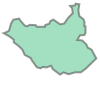

In [26]:
polygon_ss = Polygon(polyg_ss)

polygon_ss # Oh, that's South Sudan!

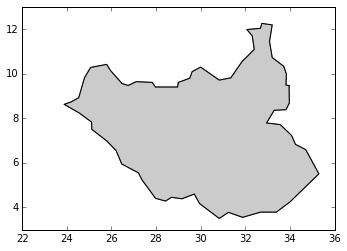

In [28]:
ss_geoserie = GeoSeries(polygon_ss)

ss_geoserie.plot()